![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating

In [5]:
import numpy as np 
import pandas as pd 

import datetime
import re
import random

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Feature scaling with StandardScaler 
from sklearn.preprocessing import StandardScaler 

# Feature scaling with MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler 

In [6]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [7]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [8]:
# DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
DATA_DIR = ''
df_train = pd.read_csv(DATA_DIR+'main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'sample_submission.csv')

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [10]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [12]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [13]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [14]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [15]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_train.append(df_test, sort=False).reset_index(drop=True) # объединяем

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Rating             50000 non-null  float64
 5   Price Range        32639 non-null  object 
 6   Number of Reviews  46800 non-null  float64
 7   Reviews            49998 non-null  object 
 8   URL_TA             50000 non-null  object 
 9   ID_TA              50000 non-null  object 
 10  sample             50000 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Имеем 4 числовых столбца, 7 столбцов типа object.     
В 4х столбцах (три из которых object) имеются пропуски.

Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

### Restaurant_id     
      
Пустых ячеек нет.      

In [17]:
data.Restaurant_id

0        id_5569
1        id_1535
2         id_352
3        id_3456
4         id_615
          ...   
49995    id_9995
49996    id_9996
49997    id_9997
49998    id_9998
49999    id_9999
Name: Restaurant_id, Length: 50000, dtype: object

In [18]:
data.Restaurant_id = data.Restaurant_id.apply(lambda x: float(x[3:]))

In [19]:
len(data[data.Restaurant_id == 100])

13

<AxesSubplot:>

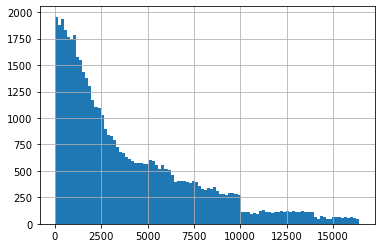

In [20]:
data.Restaurant_id.hist(bins=100)

Признак Restaurant_id - числовой; не является уникальным идентификационным номером ресторана и имеет несимметричное распределение с обрывом слева.

25-й перцентиль: 1111.0, 75-й перцентиль: 5918.0, IQR: 4807.0,  Границы выбросов: [-6099.5, 13128.5].


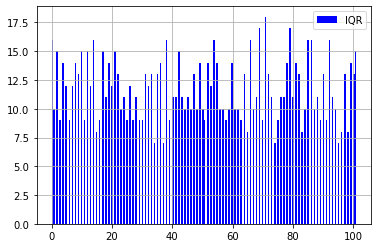

In [21]:
# рассчитаем границы выбросов, если таковые имеются
median = data.Restaurant_id.median()
IQR = data.Restaurant_id.quantile(0.75) - data.Restaurant_id.quantile(0.25)
perc25 = data.Restaurant_id.quantile(0.25)
perc75 = data.Restaurant_id.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

data.Restaurant_id.loc[data.Restaurant_id.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 200, 
                                                                        range = (0, 101),
                                                                        color = 'blue',
                                                                        label = 'IQR')

plt.legend();

Имеем загадочные чередующиеся уплотнения распределяемых данных на интервал.     
Расчет показывает наличие выбросов, однако мы не знаем природу данного параметра и не можем судить о возможном разбросе данных.     


### City    
     
Путых данных нет.     

In [22]:
len(data.City.value_counts())

31

In [23]:
data.City.value_counts()

London        7193
Paris         6108
Madrid        3813
Barcelona     3395
Berlin        2705
Milan         2694
Rome          2589
Prague        1816
Lisbon        1647
Vienna        1443
Amsterdam     1372
Brussels      1314
Hamburg       1186
Munich        1145
Lyon          1126
Stockholm     1033
Budapest      1021
Warsaw         925
Dublin         836
Copenhagen     819
Athens         776
Edinburgh      745
Zurich         685
Oporto         642
Geneva         590
Krakow         554
Oslo           488
Helsinki       475
Bratislava     380
Luxembourg     263
Ljubljana      222
Name: City, dtype: int64

<AxesSubplot:>

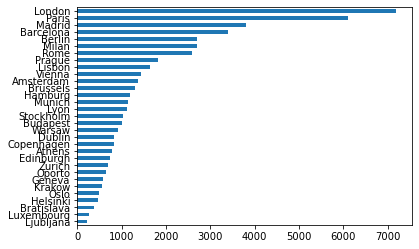

In [24]:
data['City'].value_counts(ascending=True).plot(kind='barh')

City - категориальный признак.    
Рестораны в датасете представлены в разных городах, количество городов - 31, все города Европейские.   

In [25]:
# Признак is_capital - является ли город столицей

data['is_capital'] = data.apply(lambda x: 1 if x.City == 'Paris' or x.City == 'Stockholm' or x.City == 'London' 
                            or x.City == 'Berlin' or x.City == 'Bratislava' or x.City == 'Vienna' 
                            or x.City == 'Rome' or x.City == 'Madrid' or x.City == 'Dublin' 
                            or x.City == 'Brussels' or x.City == 'Warsaw' or x.City == 'Budapest'
                            or x.City == 'Copenhagen' or x.City == 'Amsterdam' or x.City == 'Lisbon' 
                            or x.City == 'Prague' or x.City == 'Oslo' or x.City == 'Helsinki'
                            or x.City == 'Ljubljana' or x.City == 'Athens' or x.City == 'Luxembourg' 
                            else 0, axis=1)

In [26]:
# dummy-параметры на основании столбца City

dummies = pd.get_dummies(data['City'])
data = pd.concat([data, dummies], axis=1)

In [27]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich
31194,312.0,Copenhagen,"['Danish', 'Cafe', 'Fusion', 'Vegetarian Frien...",313.0,4.0,$$ - $$$,133.0,"[['Nice food at good good rates', 'Very Tasty'...",/Restaurant_Review-g189541-d793573-Reviews-Caf...,d793573,...,0,0,0,0,0,0,0,0,0,0
49608,9608.0,Vienna,NaN,1779.0,0.0,NaN,NaN,NaN,/Restaurant_Review-g190454-d12605368-Reviews-R...,d12605368,...,0,0,0,0,0,0,0,1,0,0
22058,838.0,Paris,"['Asian', 'Vietnamese', 'Soups', 'Vegetarian F...",839.0,4.0,$,1182.0,"[['Not bad', 'Pretty good'], ['01/02/2018', '0...",/Restaurant_Review-g187147-d719829-Reviews-Pho...,d719829,...,0,0,0,1,0,0,0,0,0,0
25457,191.0,Ljubljana,NaN,192.0,4.0,NaN,12.0,"[['Lovely ambient', 'Meeting hub for Ljubljana...",/Restaurant_Review-g274873-d8397480-Reviews-Ka...,d8397480,...,0,0,0,0,0,0,0,0,0,0
29693,305.0,Lisbon,"['European', 'Portuguese', 'Mediterranean', 'V...",306.0,5.0,$$ - $$$,45.0,"[['Local flavor and atmosphere', 'Dinner'], ['...",/Restaurant_Review-g189158-d12659150-Reviews-M...,d12659150,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Признак City_Life_Quality - рейтинг качества жизни в городах

data['City_Life_Quality'] = data.apply(lambda x: 39 if x.City == 'Paris' else 23 if x.City == 'Stockholm' 
                                   else 41 if x.City == 'London' else 13 if x.City == 'Berlin' 
                                   else 38 if x.City == 'Oporto' else 41 if x.City == 'Milan'
                                   else 80 if x.City == 'Bratislava' else 56 if x.City == 'Rome'
                                   else 43 if x.City == 'Barcelona'else 46 if x.City == 'Madrid'
                                   else 33 if x.City == 'Dublin' else 28 if x.City == 'Brussels'
                                   else 82 if x.City == 'Warsaw' else 76 if x.City == 'Budapest'
                                   else 8 if x.City == 'Copenhagen' else 11 if x.City == 'Amsterdam'
                                   else 40 if x.City == 'Lyon' else 19 if x.City == 'Hamburg'
                                   else 37 if x.City == 'Lisbon' else 69 if x.City == 'Prague'
                                   else 25 if x.City == 'Oslo' else 31 if x.City == 'Helsinki'
                                   else 45 if x.City == 'Edinburgh' else 9 if x.City == 'Geneva'
                                   else 74 if x.City == 'Ljubljana' else 89 if x.City == 'Athens'
                                   else 18 if x.City == 'Luxembourg' else 100 if x.City == 'Krakow'
                                   else 1 if x.City == 'Vienna' else 2 if x.City == 'Zurich' 
                                   else 3 if x.City == 'Munich' else 1000, axis=1)

# https://mobilityexchange.mercer.com/Insights/quality-of-living-rankings

In [29]:
# Признак City_Population - количество жителей в городах 

data['City_Population'] = data.apply(lambda x: 11400000 if x.City == 'Paris' else 2225000 if x.City == 'Stockholm' 
                                   else 14800000 if x.City == 'London' else 4725000 if x.City == 'Berlin' 
                                   else 1540000 if x.City == 'Oporto' else 6200000 if x.City == 'Milan'
                                   else 4600000 if x.City == 'Bratislava' else 3575000 if x.City == 'Rome'
                                   else 4775000 if x.City == 'Barcelona'else 6550000 if x.City == 'Madrid'
                                   else 1390000 if x.City == 'Dublin' else 2700000 if x.City == 'Brussels'
                                   else 2375000 if x.City == 'Warsaw' else 2625000 if x.City == 'Budapest'
                                   else 1680000 if x.City == 'Copenhagen' else 2475000 if x.City == 'Amsterdam'
                                   else 1980000 if x.City == 'Lyon' else 2875000 if x.City == 'Hamburg'
                                   else 2475000 if x.City == 'Lisbon' else 1440000 if x.City == 'Prague'
                                   else 1190000 if x.City == 'Oslo' else 1300000 if x.City == 'Helsinki'
                                   else 537000 if x.City == 'Edinburgh' else 614000 if x.City == 'Geneva'
                                   else 288000 if x.City == 'Ljubljana' else 3350000 if x.City == 'Athens'
                                   else 626000 if x.City == 'Luxembourg' else 1000000 if x.City == 'Krakow'
                                   else 2250000 if x.City == 'Vienna' else 1430000 if x.City == 'Zurich' 
                                   else 2250000 if x.City == 'Munich' else 1000, axis=1)

# https://en.wikipedia.org/wiki/List_of_metropolitan_areas_in_Europe

### Cuisine Style    
      
38410 записей из 50000.    
23% данных в параметре отсутствует

In [30]:
data['Cuisine Style']

0                  ['European', 'French', 'International']
1                                                      NaN
2        ['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...
3                                                      NaN
4        ['German', 'Central European', 'Vegetarian Fri...
                               ...                        
49995    ['Caribbean', 'Barbecue', 'Jamaican', 'Vegetar...
49996         ['Indian', 'Asian', 'Nepali', 'Bangladeshi']
49997                                                  NaN
49998                                          ['Italian']
49999                                                  NaN
Name: Cuisine Style, Length: 50000, dtype: object

Сохраним информацию об отсутствии данных

In [31]:
data['Nan_Cuisine_Style'] = pd.isna(data['Cuisine Style']).astype('uint8')

In [32]:
data['Cuisine Style'].loc[0]

"['European', 'French', 'International']"

In [33]:
# Признак Num_Cuisine - количесво кухонь, представленных в ресторане

data['Num_Cuisine'] = data['Cuisine Style'].str.count(',') + 1
data['Num_Cuisine'].fillna(1, inplace=True)

Как видим, данные не "чистые": каждая ячейка предсавляет собой список из названий разновидностей кухонь. Выясним, сколько всего таких разновидностей в вверенном нам датасете.

In [34]:
(pd.Series(data['Cuisine Style'].str.cat(sep=',').replace("[", '').replace("]","").replace(' ', '').replace("'", '').split(',')).value_counts())

VegetarianFriendly    14021
European              12561
Mediterranean          7820
Italian                7433
VeganOptions           5684
                      ...  
Yunnan                    2
Salvadoran                1
Xinjiang                  1
Burmese                   1
Latvian                   1
Length: 125, dtype: int64

Cuisine Style - категориальный признак.

125 разновидностей кухонь - не мало.    
Наиболее распространенным является Vegeterian Friendly.    
Из этих разновидностей можно вычленить вегатерианскую кухню (в неё же засунем Vegan Options - да простят меня веганы), локальную кухню - кухня страны (во Франции- француская, в Германии - немецкая и тд), и, поскольку это Европа, то нельзя игнорировать Европейскую кухню - её можно обозначить как популярную.      
Остальные кухни можно выделить в отдельные признаки.       
       
Начнем с заполнения пустых значений.     
Количество Vegetarian Friendly и European на порядок отличается от остальных значений, поэтому рискнем предположить, что в отсутствующих значениях Cuisine Style с большой вероятностью могут быть эти два значения.   

In [35]:
data['Cuisine Style'].fillna("['European', 'Vegetarian Friendly']", inplace=True)

Теперь займемся локальной кухни. Поскольку локальность у нас будет определяться по стране, то введем дополнительный параметр - название страны.

In [36]:
# Признак Country - страна 

data['Country'] = data.apply(lambda x: 'France' if x.City == 'Paris' or x.City == 'Lyon'
                         else 'Sweden' if x.City == 'Stockholm' else 'UK' if x.City == 'London' 
                         or x.City == 'Edinburgh' else 'Germany' if x.City == 'Berlin' or x.City == 'Munich' 
                         or x.City == 'Hamburg' else 'Portugal' if x.City == 'Oporto' or x.City == 'Lisbon'
                         else 'Italy' if x.City == 'Milan' or x.City == 'Rome' else 'Slovakia' if x.City == 'Bratislava'
                         else 'Austria' if x.City == 'Vienna' else 'Spain' if x.City == 'Barcelona' or x.City == 'Madrid'
                         else 'Ireland' if x.City == 'Dublin' else 'Belgium' if x.City == 'Brussels'
                         else 'Switzerland' if x.City == 'Zurich' or x.City == 'Geneva' 
                         else 'Poland' if x.City == 'Warsaw' or x.City == 'Krakow'
                         else 'Hungary' if x.City == 'Budapest' else 'Denmark' if x.City == 'Copenhagen' 
                         else 'Netherlands' if x.City == 'Amsterdam' else 'Czech Republic' if x.City == 'Prague'
                         else 'Norway' if x.City == 'Oslo' else 'Finland' if x.City == 'Helsinki'
                         else 'Slovenia' if x.City == 'Ljubljana' else 'Greece' if x.City == 'Athens'
                         else 'Luxembourg' if x.City == 'Luxembourg' else 1000, axis=1)

In [37]:
len(data['Country'].value_counts())

22

In [38]:
# Признак local_cuisine - наличие локальной кухни в Cuisine Style

data['local_cuisine'] = 0
 
# введем два списка - страны, которые есть в датасете, и соответствующие странам названия кухонь

list_of_Countries = ['France', 'Sweden', 'UK', 'Germany', 'Portugal', 'Italy', 'Slovakia', 'Austria',
                     'Spain', 'Ireland', 'Belgium', 'Switzerland', 'Poland', 'Hungary', 'Denmark', 
                     'Netherlands', 'Czech Republic', 'Norway', 'Finland', 'Slovenia', 'Greece',
                     'Luxembourg']

list_of_Country_Cuisines = ['French', 'Swedish', 'British', 'German', 'Portuguese', 'Italian', 'Slovak',
                    'Austrian', 'Spanish', 'Irish', 'Belgian', 'Swiss', 'Polish', 'Hungarian', 'Danish',
                    'Dutch', 'Czech', 'Norwegian', 'Finnish', 'Slovenian', 'Greek', 'Luxembourg']

# Для каждой локальной кухни страны проверяем условие наличия этой кухни в Cuisine Style и страну 
# (например, французская кухня в Италии не будет локальной, а во Франции - да)

for i in range(len(list_of_Country_Cuisines)):
    data.loc[(data['Cuisine Style'].str.contains(list_of_Country_Cuisines[i])) & (data.Country == list_of_Countries[i]), 'local_cuisine'] = 1

Теперь возьмемся за вегатерианские кухни - выделим Vegeterian Frienly и Vegan Option в отдельный объединенный признак

In [39]:
# Признак vegeterian_friendly - наличие в Cuisine Style вегетарианского или веганского меню

data['vegeterian_friendly'] = 0
data.loc[data['Cuisine Style'].str.contains('Vegetarian') == True, 'vegeterian_friendly'] = 1
data.loc[data['Cuisine Style'].str.contains('Vegan') == True, 'vegeterian_friendly'] = 1

Выделим параметр pop_cuisine для европейской кухни.

In [40]:
# Признак pop_cuisine - наличие в Cuisine Style европейского (European) меню

data['pop_cuisine'] = 0
data.loc[data['Cuisine Style'].str.contains('European') == True, 'pop_cuisine'] = 1

И, наконец, выделим для каждой кухни отдельный параметр. Кухни Vegeterien Friendly, Vegan Option и European под раздачу параметров уже попали выше, поэтому теперь обойдемся без них.    
Те кухни, которые мы смотрели, как локальные, остаются на раздаче потому как они могут встречаться не только в стране, где они локальные (пример с французской кухней в Италии).

In [41]:
# dummy-параметры на основании столбца Cuisine Style

Cuisine_Style_List = list(set(data['Cuisine Style'].str.cat(sep=',').replace("[", '').replace("]","").replace("'", '').replace(' ', '').split(',')))
# 'Vegetarian', 'Vegan', 'European' исключены, тк они вынесены отдельно как популярные и Vegeterian Friendly
Cuisine_Style_List = [a for a in Cuisine_Style_List if a != 'VegetarianFriendly' and a != 'VeganOptions' and a != 'European']

for i in range(len(Cuisine_Style_List)):
    data[Cuisine_Style_List[i]] = 0
    data.loc[data['Cuisine Style'].str.contains(Cuisine_Style_List[i], case=False, na=False), Cuisine_Style_List[i]] = 1

In [42]:
city_list = list(data.City.unique())

In [43]:
# Признак Pizza_Num - в каком городе больше всего пиццерий

for city in city_list:
    data.loc[data.City == city, 'Pizza_Num'] = data.loc[data.City == city, 'Pizza'].sum()

In [44]:
# Признак restaurant_num_in_City - количество ресторанов в городе

#data['restaurant_num_in_City'] = 0
for city in city_list:
    data.loc[data.City == city, 'restaurant_num_in_City'] = data[data.City == city].City.count()

In [45]:
# dummy признак для Country

dummies = pd.get_dummies(data['Country'])
data = pd.concat([data, dummies], axis=1)

### Ranking      
      
Пустых ячеек нет      

In [46]:
data.Ranking.sample(5)

38444    2028.0
6318      134.0
3240     9667.0
31766    2500.0
10278    1917.0
Name: Ranking, dtype: float64

<AxesSubplot:>

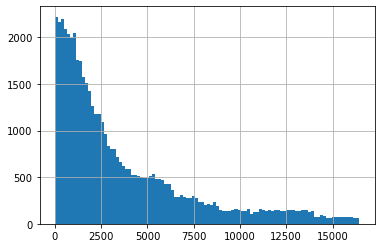

In [47]:
data.Ranking.hist(bins=100)

Ranking - признак числовой, непрерывный.   
Как видим, распределение Ranking очень похоже на распределение Restaurant_id. Данное сходство дает нам основание предоложить, что эти признаки могут дублировать друг друга.     
Исходя из данного нам описания признака, Ranking - это ранг ресторана относительно других ресторанов в этом городе.    
Описание дает нам основание предположить, что Ranking и City как-то связаны. Попробуем посмотреть на распределение Ranking в пределах одного города.

<AxesSubplot:>

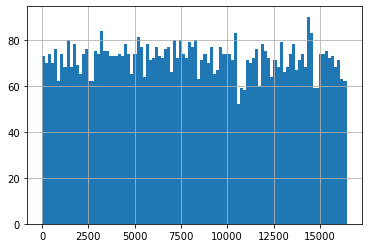

In [48]:
data['Ranking'][data['City'] =='London'].hist(bins=100)

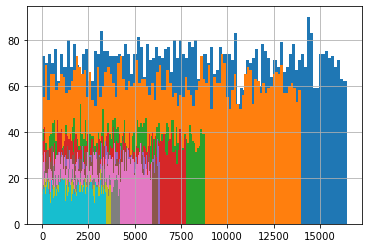

In [49]:
# посмотрим на топ 10 городов
for x in (data['City'].value_counts())[0:10].index:
    data['Ranking'][data['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение в пределах каждого города, просто в больших городах больше ресторанов, из-за этого имеем смещение.     

Необходимо пронормировать Ranking по городам.

In [50]:
list_of_City = data.City.unique()

In [51]:
# Стандартная нормировка Restaurant_id и Ranking 
# (x - x.mean)/Standart_Deviation

data['std_id'] = 0 
data['std_Ranking'] = 0
#data = data.sort_values(by = ['City', 'Ranking'], axis=0).reset_index(drop=True)
for City in list_of_City:
    loc_data = data[data.City == City]
    scale_features_std = StandardScaler() 
    # Пронормируем за одно и Restaurant_id
    std_id_Ranking = scale_features_std.fit_transform(loc_data[['Restaurant_id','Ranking']]) 
    j=0
    for i in data.index[data['City']==City]:
        data.loc[i, 'std_id']= pd.DataFrame(std_id_Ranking[:,0]).loc[j][0]
        data.loc[i, 'std_Ranking'] = pd.DataFrame(std_id_Ranking[:,1]).loc[j][0]
        j += 1

In [52]:
# Нормировка min-max для Restaurant_id и Ranking 
# (x - x.min)/(x.max = x.min)

data['min_max_id'] = 0 
data['min_max_Ranking'] = 0
#data = data.sort_values(by = ['City', 'Ranking'], axis=0).reset_index(drop=True)
for City in list_of_City:
    loc_data = data[data.City == City]
    scale_features_mm = MinMaxScaler()  
    min_max_id_Ranking = scale_features_mm.fit_transform(loc_data[['Restaurant_id','Ranking']]) 
    j=0
    for i in data.index[data['City']==City]:
        data.loc[i, 'min_max_id']= pd.DataFrame(min_max_id_Ranking[:,0]).loc[j][0]
        data.loc[i, 'min_max_Ranking'] = pd.DataFrame(min_max_id_Ranking[:,1]).loc[j][0]
        j += 1

In [53]:
#  Посмотрим, как отображаются новые признаки, распечатаем к примеру Рим
data[data.City == 'Rome'].head(10)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,Slovakia,Slovenia,Spain,Sweden,Switzerland,UK,std_id,std_Ranking,min_max_id,min_max_Ranking
9,4209.0,Rome,"['Italian', 'Pizza', 'Fast Food']",4210.0,4.0,$,55.0,"[['Clean efficient staff', 'Nice little pizza ...",/Restaurant_Review-g187791-d8020681-Reviews-Qu...,d8020681,...,0,0,0,0,0,0,0.390736,0.721903,0.421321,0.707752
34,2427.0,Rome,"['Italian', 'Pizza']",2428.0,4.5,$,69.0,"[['Delicious pizza and friendly staff', 'Best ...",/Restaurant_Review-g187791-d5263694-Reviews-Pi...,d5263694,...,0,0,0,0,0,0,-0.440536,-0.316155,0.242943,0.408105
37,5209.0,Rome,"['Japanese', 'Sushi', 'Asian']",5210.0,5.0,$$ - $$$,2.0,"[[], []]",/Restaurant_Review-g187791-d13322935-Reviews-G...,d13322935,...,0,0,0,0,0,0,0.857218,1.304427,0.521421,0.875904
82,361.0,Rome,"['Italian', 'Pizza', 'Mediterranean', 'Barbecu...",362.0,4.5,$$ - $$$,288.0,"[['So cosy and beautiful', 'Excellent! Loved t...",/Restaurant_Review-g187791-d7361724-Reviews-In...,d7361724,...,0,0,0,0,0,0,-1.404289,-1.519650,0.036136,0.060703
111,5296.0,Rome,['Italian'],5298.0,4.0,NaN,9.0,"[[], []]",/Restaurant_Review-g187791-d11951657-Reviews-V...,d11951657,...,0,0,0,0,0,0,0.897802,1.355689,0.530130,0.890701
123,3015.0,Rome,"['Italian', 'Pizza', 'Mediterranean', 'Europea...",3016.0,3.0,$$ - $$$,1012.0,"[['Don’t go there!', 'Really bad!'], ['12/30/2...",/Restaurant_Review-g187791-d2226584-Reviews-Fr...,d2226584,...,0,0,0,0,0,0,-0.166244,0.026369,0.301802,0.506978
126,2423.0,Rome,"['Italian', 'Pizza', 'Mediterranean', 'Europea...",2424.0,3.5,$$ - $$$,481.0,"[['Good pizza and atmosphere', 'Great little p...",/Restaurant_Review-g187791-d5504724-Reviews-Ri...,d5504724,...,0,0,0,0,0,0,-0.442402,-0.318485,0.242543,0.407432
137,820.0,Rome,"['Italian', 'Pizza', 'Vegetarian Friendly']",821.0,5.0,$,134.0,"[['very specific', 'Yummy 👍'], ['09/26/2017', ...",/Restaurant_Review-g187791-d4085056-Reviews-Pi...,d4085056,...,0,0,0,0,0,0,-1.190173,-1.252271,0.082082,0.137885
141,4157.0,Rome,['Italian'],4158.0,4.0,$$ - $$$,182.0,"[['Charming Terrace Bar and Restaurant!', 'Nic...",/Restaurant_Review-g187791-d2321047-Reviews-So...,d2321047,...,0,0,0,0,0,0,0.366479,0.691611,0.416116,0.699008
172,3233.0,Rome,"['Italian', 'Mediterranean', 'Gluten Free Opti...",3234.0,3.5,$$ - $$$,209.0,"[['Very good aperitivo!', 'Very good'], ['10/3...",/Restaurant_Review-g187791-d11998026-Reviews-E...,d11998026,...,0,0,0,0,0,0,-0.064551,0.153359,0.323624,0.543635


<AxesSubplot:>

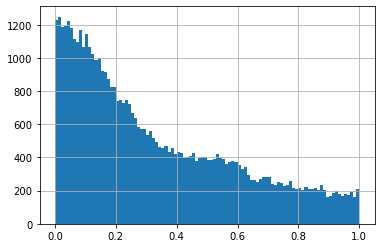

In [54]:
data['min_max_id'].hist(bins=100)

<AxesSubplot:>

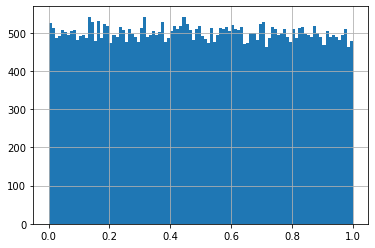

In [55]:
data['min_max_Ranking'].hist(bins=100)

<AxesSubplot:>

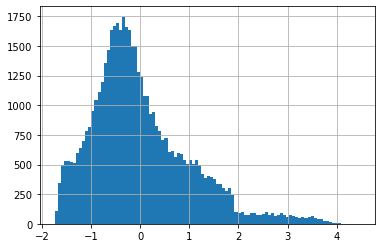

In [56]:
data['std_id'].hist(bins=100)

<AxesSubplot:>

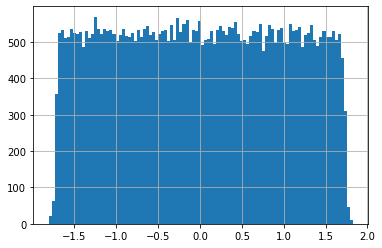

In [57]:
data['std_Ranking'].hist(bins=100)

Пронормировав Ranking в разрезе одного города, получили нормальное распределение.
Как побочный эффект, получили аналогичным образом пронормированный Restaurant_id, у которого стандартная нормировка дала нормальное распределение со смещением вправо, тогда как min-max нормировка изменила лишь порядок значений, не поменяв при этом форму распределения (такая же, как и у начального Restaurant_id).    

In [58]:
# Признак 'relative_rank' - отношение показателя Ranking к количеству ресторанов в городе 'rest_number_in_City'

data['relative_rank'] = data['Ranking'] / data['restaurant_num_in_City']

In [59]:
# Пизнак rewiew_in_City - количество отзывов в ресторанах города

for city in city_list:
    data.loc[data.City == city, 'rewiew_in_City'] = data['Number of Reviews'][data.City == city].sum()

In [60]:
# Признак relative_rank_review - отношение показателя Ranking к количеству отзывов в городе rewiew_in_City

data['relative_rank_review'] = data['Ranking'] / data['rewiew_in_City']

### Price Range     
     
17361 пустая ячейка, что составляет почти 35% от всего датасета

In [61]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

Price Range - категориальный оценочный признак.      
Запомним пустые ячейки как отдельный признак, закодируем признак для модели и заполним пропуски наиболее частым значением, поскольку разница в количестве наиболее частых значений по сравнению со всеми остальными существенна.      

In [62]:
data['Price Range_isNAN'] = pd.isna(data['Price Range']).astype('uint8')

In [63]:
# Price Range - кодировка (замена по словарю)

Price_Range_dict = {'$': 1, '$$ - $$$': 2, '$$$$': 3}

data = data.replace({"Price Range": Price_Range_dict})

In [64]:
data['Price Range'] = data.apply(lambda x: 2 if pd.isna(x['Price Range']) else x['Price Range'], axis=1)

### Reviews    
     
На первый взгляд кажется, что отсутствующих значений только 2, однако, посмотрим внимательнее на данные...    

In [65]:
data.Reviews.value_counts()

[[], []]                                                                                                         8112
[['Fantastic food, Excellent service', 'Surprising good Indian food in Spain'], ['01/07/2018', '11/08/2017']]       2
[['Very cozy!', 'Service rate: 1'], ['01/17/2016', '11/18/2015']]                                                   2
[['Great Food! Wide Variety.', 'Dinner'], ['11/26/2017', '05/23/2017']]                                             2
[['Visited the rooftop bar', 'SIXTH FLOOR ROOFTOP BUT YOU CAN ONLY SEE O...'], ['06/27/2017', '10/31/2017']]        2
                                                                                                                 ... 
[['Very good Brazilian food in Paris', 'Dinner'], ['02/23/2017', '10/05/2017']]                                     1
[['Very nice local find', 'Walking distance from Crowne Plaza St Pete...'], ['06/27/2017', '03/11/2017']]           1
[['Dinner with old work colleagues', 'Still going....'],

Имеем 8112 записей с пустыми скобками - тоже своего рода пустые данные, значит пропусков, по сути, 8114 - это составляет 16% от всего датасета.     
Видно, что данные имеют структуру записи вида      [['txt_of Review', 'txt_of Review'], ['mm/dd/yyyy', 'mm/dd/yyyy']]     
Данные такой структуры сложно продублировать в реальной жизни, если мы имеем ввиду реальных людей, писавших данные отзывы, однако видим, что некоторые данные представлены в датасете в двух идентичных экземплярах и таких данных 50000-8114[пропусков]-(41857-1)                                     [длина списка value_counts за минусом строки с пропусками] == 30               
Итого 41856 записей с уникальными отзывами                                 
Посмотрим на эти данные, но прежде запомним пустые значения в отдельную переменную.

In [66]:
data['Reviews_isna'] = pd.isna(data['Reviews']).astype('uint8')

In [67]:
data.loc[data.Reviews=='[[], []]', 'Reviews_isna'] = 1

In [68]:
data.Reviews.value_counts().index[1:31]

Index(['[['Fantastic food, Excellent service', 'Surprising good Indian food in Spain'], ['01/07/2018', '11/08/2017']]',
       '[['Very cozy!', 'Service rate: 1'], ['01/17/2016', '11/18/2015']]',
       '[['Great Food! Wide Variety.', 'Dinner'], ['11/26/2017', '05/23/2017']]',
       '[['Visited the rooftop bar', 'SIXTH FLOOR ROOFTOP BUT YOU CAN ONLY SEE O...'], ['06/27/2017', '10/31/2017']]',
       '[['Great Asian Option', 'Wow'], ['10/16/2017', '09/07/2016']]',
       '[['Great coffee and pastries, sandwiches, ver...', 'Great breakfast!'], ['02/21/2017', '09/19/2016']]',
       '[['Thursday snack', 'Good value for money & good food!'], ['03/13/2017', '06/20/2016']]',
       '[['Improve your service', 'Great value chain restaurant'], ['12/14/2017', '07/30/2017']]',
       '[['Good service and clean', 'Chinese fusion cuisine - ok to try if you...'], ['11/21/2017', '05/23/2017']]',
       '[['Delicious soup', 'My weekly treat'], ['03/19/2017', '07/30/2017']]',
       '[['Excellent'], [

In [69]:
double_Reviews = data.Reviews.value_counts().index[1:31]

In [70]:
data.info(verbose=True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 206 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Restaurant_id           50000 non-null  float64
 1   City                    50000 non-null  object 
 2   Cuisine Style           50000 non-null  object 
 3   Ranking                 50000 non-null  float64
 4   Rating                  50000 non-null  float64
 5   Price Range             50000 non-null  float64
 6   Number of Reviews       46800 non-null  float64
 7   Reviews                 49998 non-null  object 
 8   URL_TA                  50000 non-null  object 
 9   ID_TA                   50000 non-null  object 
 10  sample                  50000 non-null  int64  
 11  is_capital              50000 non-null  int64  
 12  Amsterdam               50000 non-null  uint8  
 13  Athens                  50000 non-null  uint8  
 14  Barcelona               50000 non-nul

In [71]:
for review in double_Reviews:
    display(data[data.Reviews == review])

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
38967,1238.0,Madrid,"['Indian', 'Asian', 'Nepali', 'Vegetarian Frie...",1240.0,5.0,2.0,22.0,"[['Fantastic food, Excellent service', 'Surpri...",/Restaurant_Review-g187514-d12488993-Reviews-K...,d12488993,...,0,-1.256514,-1.245790,0.124135,0.140668,0.325203,357185.0,0.003472,0,0
41171,1171.0,Madrid,"['Indian', 'Asian', 'Nepali', 'Vegetarian Frie...",1219.0,0.0,2.0,22.0,"[['Fantastic food, Excellent service', 'Surpri...",/Restaurant_Review-g187514-d12488993-Reviews-K...,d12488993,...,0,-1.282349,-1.254099,0.117417,0.138283,0.319696,357185.0,0.003413,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
39797,3001.0,Madrid,"['Diner', 'Mediterranean', 'Spanish', 'Bar']",3003.0,3.5,1.0,71.0,"[['Very cozy!', 'Service rate: 1'], ['01/17/20...",/Restaurant_Review-g187514-d3647024-Reviews-La...,d3647024,...,0,-0.576704,-0.548215,0.300912,0.340827,0.787569,357185.0,0.008407,0,0
47408,7408.0,Madrid,"['Diner', 'Mediterranean', 'Spanish', 'Bar']",3001.0,0.0,1.0,71.0,"[['Very cozy!', 'Service rate: 1'], ['01/17/20...",/Restaurant_Review-g187514-d3647024-Reviews-La...,d3647024,...,0,1.122628,-0.549006,0.742806,0.340599,0.787044,357185.0,0.008402,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
16920,3536.0,Madrid,"['International', 'Mediterranean', 'Spanish', ...",3538.0,4.0,2.0,52.0,"[['Great Food! Wide Variety.', 'Dinner'], ['11...",/Restaurant_Review-g187514-d11999956-Reviews-S...,d11999956,...,0,-0.370409,-0.336528,0.354557,0.401567,0.927878,357185.0,0.009905,0,0
29879,3662.0,Madrid,"['International', 'Mediterranean', 'Spanish', ...",3664.0,4.0,2.0,52.0,"[['Great Food! Wide Variety.', 'Dinner'], ['11...",/Restaurant_Review-g187514-d11999956-Reviews-S...,d11999956,...,0,-0.321823,-0.286673,0.367191,0.415872,0.960923,357185.0,0.010258,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
18388,1229.0,Madrid,"['Bar', 'European', 'Spanish', 'Delicatessen']",1231.0,4.0,3.0,116.0,"[['Visited the rooftop bar', 'SIXTH FLOOR ROOF...",/Restaurant_Review-g187514-d1028622-Reviews-La...,d1028622,...,0,-1.259984,-1.249351,0.123233,0.139646,0.322843,357185.0,0.003446,0,0
44534,4534.0,Madrid,"['Bar', 'European', 'Spanish', 'Delicatessen']",1253.0,0.0,3.0,116.0,"[['Visited the rooftop bar', 'SIXTH FLOOR ROOF...",/Restaurant_Review-g187514-d1028622-Reviews-La...,d1028622,...,0,0.014419,-1.240646,0.454627,0.142144,0.328613,357185.0,0.003508,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
36934,3140.0,Madrid,"['Japanese', 'Sushi', 'Asian', 'Thai']",3142.0,3.5,2.0,77.0,"[['Great Asian Option', 'Wow'], ['10/16/2017',...",/Restaurant_Review-g187514-d2360290-Reviews-Lo...,d2360290,...,0,-0.523106,-0.493216,0.31485,0.356608,0.824023,357185.0,0.008797,0,0
44209,4209.0,Madrid,"['Japanese', 'Sushi', 'Asian', 'Thai']",3270.0,0.0,2.0,77.0,"[['Great Asian Option', 'Wow'], ['10/16/2017',...",/Restaurant_Review-g187514-d2360290-Reviews-Lo...,d2360290,...,0,-0.110901,-0.442569,0.42204,0.371140,0.857592,357185.0,0.009155,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
21704,2906.0,Madrid,['Spanish'],2908.0,4.5,2.0,21.0,"[['Great coffee and pastries, sandwiches, ver....",/Restaurant_Review-g187514-d3748757-Reviews-D_...,d3748757,...,0,-0.613336,-0.585804,0.291387,0.330041,0.762654,357185.0,0.008141,0,0
44992,4992.0,Madrid,['Spanish'],3149.0,0.0,2.0,21.0,"[['Great coffee and pastries, sandwiches, ver....",/Restaurant_Review-g187514-d3748757-Reviews-D_...,d3748757,...,0,0.191023,-0.490446,0.500551,0.357402,0.825859,357185.0,0.008816,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
25251,3575.0,Madrid,"['Spanish', 'Bar']",3577.0,3.5,1.0,217.0,"[['Thursday snack', 'Good value for money & go...",/Restaurant_Review-g187514-d3161682-Reviews-Ce...,d3161682,...,0,-0.35537,-0.321097,0.358468,0.405995,0.938106,357185.0,0.010014,0,0
39847,3709.0,Madrid,"['Spanish', 'Bar']",3711.0,3.5,1.0,217.0,"[['Thursday snack', 'Good value for money & go...",/Restaurant_Review-g187514-d3161682-Reviews-Ce...,d3161682,...,0,-0.30370,-0.268077,0.371904,0.421208,0.973249,357185.0,0.010390,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
33210,2286.0,Madrid,"['International', 'American', 'Vegetarian Frie...",2288.0,3.5,2.0,327.0,"[['Improve your service', 'Great value chain r...",/Restaurant_Review-g187514-d2669414-Reviews-Vi...,d2669414,...,0,-0.852407,-0.831122,0.229219,0.259650,0.600052,357185.0,0.006406,0,0
49830,9830.0,Madrid,"['International', 'American', 'Vegetarian Frie...",2334.0,0.0,2.0,327.0,"[['Improve your service', 'Great value chain r...",/Restaurant_Review-g187514-d2669414-Reviews-Vi...,d2669414,...,0,2.056547,-0.812921,0.985661,0.264873,0.612116,357185.0,0.006534,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
29661,2988.0,Madrid,"['Chinese', 'Asian', 'Vegetarian Friendly', 'V...",2990.0,3.5,2.0,148.0,"[['Good service and clean', 'Chinese fusion cu...",/Restaurant_Review-g187514-d4748208-Reviews-Re...,d4748208,...,0,-0.581717,-0.553358,0.299609,0.339351,0.784159,357185.0,0.008371,0,0
46140,6140.0,Madrid,"['Chinese', 'Asian', 'Vegetarian Friendly', 'V...",3053.0,0.0,2.0,148.0,"[['Good service and clean', 'Chinese fusion cu...",/Restaurant_Review-g187514-d4748208-Reviews-Re...,d4748208,...,0,0.633689,-0.528431,0.615662,0.346503,0.800682,357185.0,0.008547,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
13576,1277.0,Madrid,"['Asian', 'Thai', 'Vegetarian Friendly']",1279.0,4.0,2.0,70.0,"[['Delicious soup', 'My weekly treat'], ['03/1...",/Restaurant_Review-g187514-d10440367-Reviews-B...,d10440367,...,0,-1.241475,-1.230359,0.128046,0.145095,0.335431,357185.0,0.003581,0,0
48551,8551.0,Madrid,"['Asian', 'Thai', 'Vegetarian Friendly']",1206.0,0.0,2.0,70.0,"[['Delicious soup', 'My weekly treat'], ['03/1...",/Restaurant_Review-g187514-d10440367-Reviews-B...,d10440367,...,0,1.563367,-1.259243,0.857415,0.136807,0.316286,357185.0,0.003376,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
6024,3817.0,Madrid,"['Japanese', 'Peruvian', 'South American', 'Sp...",3819.0,5.0,2.0,16.0,"[['Excellent'], ['09/03/2015']]",/Restaurant_Review-g187514-d7827387-Reviews-El...,d7827387,...,0,-0.262055,-0.225344,0.382733,0.433470,1.001574,357185.0,0.010692,1,0
47376,7376.0,Madrid,"['Japanese', 'Peruvian', 'South American', 'Sp...",4279.0,0.0,2.0,16.0,"[['Excellent'], ['09/03/2015']]",/Restaurant_Review-g187514-d7827387-Reviews-El...,d7827387,...,0,1.110289,-0.043333,0.739597,0.485695,1.122213,357185.0,0.011980,1,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
15295,475.0,Madrid,"['Japanese', 'Vegetarian Friendly', 'Vegan Opt...",476.0,4.5,2.0,67.0,"[['Whenever in Madrid, we never miss this gem....",/Restaurant_Review-g187514-d9877640-Reviews-Ra...,d9877640,...,0,-1.550725,-1.548086,0.047629,0.053928,0.124836,357185.0,0.001333,0,0
15565,530.0,Madrid,"['Japanese', 'Vegetarian Friendly', 'Vegan Opt...",531.0,4.5,2.0,67.0,"[['Whenever in Madrid, we never miss this gem....",/Restaurant_Review-g187514-d9877640-Reviews-Ra...,d9877640,...,0,-1.529517,-1.526324,0.053143,0.060173,0.139260,357185.0,0.001487,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
8019,2361.0,Madrid,"['Seafood', 'Mediterranean', 'European', 'Span...",2363.0,4.0,2.0,190.0,"[['Nice restaurant in Madrid', 'Highly reccome...",/Restaurant_Review-g187514-d987900-Reviews-Com...,d987900,...,0,-0.823487,-0.801447,0.236739,0.268165,0.619722,357185.0,0.006616,0,0
22998,2312.0,Madrid,"['Seafood', 'Mediterranean', 'European', 'Span...",2314.0,4.0,2.0,190.0,"[['Nice restaurant in Madrid', 'Highly reccome...",/Restaurant_Review-g187514-d987900-Reviews-Com...,d987900,...,0,-0.842381,-0.820835,0.231826,0.262602,0.606871,357185.0,0.006478,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
13942,1103.0,Madrid,['Spanish'],1104.0,4.5,2.0,73.0,"[['ok for beer, not for dinner'], ['12/20/2017']]",/Restaurant_Review-g187514-d8753348-Reviews-Tr...,d8753348,...,0,-1.308569,-1.299602,0.110599,0.125227,0.289536,357185.0,0.003091,0,0
31238,1212.0,Madrid,['Spanish'],1213.0,4.5,2.0,73.0,"[['ok for beer, not for dinner'], ['12/20/2017']]",/Restaurant_Review-g187514-d8753348-Reviews-Tr...,d8753348,...,0,-1.266539,-1.256473,0.121528,0.137602,0.318122,357185.0,0.003396,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
10439,468.0,Madrid,"['Mediterranean', 'Spanish', 'Vegetarian Frien...",469.0,4.0,2.0,355.0,"[['Very good all around', 'Our first Madrid re...",/Restaurant_Review-g187514-d1315077-Reviews-El...,d1315077,...,0,-1.553424,-1.550856,0.046927,0.053134,0.123000,357185.0,0.001313,0,0
25785,511.0,Madrid,"['Mediterranean', 'Spanish', 'Vegetarian Frien...",512.0,4.0,2.0,355.0,"[['Very good all around', 'Our first Madrid re...",/Restaurant_Review-g187514-d1315077-Reviews-El...,d1315077,...,0,-1.536844,-1.533842,0.051238,0.058015,0.134277,357185.0,0.001433,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
22924,2359.0,Madrid,"['Spanish', 'Mediterranean']",2361.0,4.5,2.0,16.0,"[['The real codido madrileño'], ['03/31/2017']]",/Restaurant_Review-g187514-d7342803-Reviews-Lo...,d7342803,...,0,-0.824258,-0.802238,0.236539,0.267938,0.619197,357185.0,0.006610,0,0
36275,2467.0,Madrid,"['Spanish', 'Mediterranean']",2469.0,4.5,2.0,16.0,"[['The real codido madrileño'], ['03/31/2017']]",/Restaurant_Review-g187514-d7342803-Reviews-Lo...,d7342803,...,0,-0.782613,-0.759505,0.247368,0.280200,0.647522,357185.0,0.006912,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
5240,2406.0,Madrid,"['Italian', 'French', 'European']",2408.0,4.0,2.0,148.0,"[['Sat night', 'Can\'t even explain.. ""A"" plac...",/Restaurant_Review-g187514-d793170-Reviews-Car...,d793170,...,0,-0.806135,-0.783641,0.241251,0.273274,0.631524,357185.0,0.006742,0,0
36822,2487.0,Madrid,"['Italian', 'French', 'European']",2489.0,4.0,2.0,148.0,"[['Sat night', 'Can\'t even explain.. ""A"" plac...",/Restaurant_Review-g187514-d793170-Reviews-Car...,d793170,...,0,-0.774901,-0.751592,0.249373,0.282470,0.652767,357185.0,0.006968,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
29640,3302.0,Madrid,"['Chinese', 'Japanese', 'Asian']",3304.0,4.0,2.0,53.0,"[['Excellent food food', 'Fantastic sushi serv...",/Restaurant_Review-g187514-d4914988-Reviews-Xi...,d4914988,...,0,-0.460639,-0.429116,0.331094,0.375000,0.866509,357185.0,0.009250,0,0
42654,2654.0,Madrid,"['Chinese', 'Japanese', 'Asian']",3146.0,0.0,2.0,53.0,"[['Excellent food food', 'Fantastic sushi serv...",/Restaurant_Review-g187514-d4914988-Reviews-Xi...,d4914988,...,0,-0.710506,-0.491633,0.266119,0.357062,0.825072,357185.0,0.008808,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
3942,5646.0,Madrid,"['Lebanese', 'Mediterranean', 'Middle Eastern'...",5649.0,3.5,2.0,443.0,"[['Good Lebanese food', 'Decent place'], ['07/...",/Restaurant_Review-g187514-d3685055-Reviews-Sh...,d3685055,...,0,0.443204,0.498742,0.566129,0.641235,1.481511,357185.0,0.015815,0,0
27680,5617.0,Madrid,"['Lebanese', 'Mediterranean', 'Middle Eastern'...",5620.0,3.5,2.0,443.0,"[['Good Lebanese food', 'Decent place'], ['07/...",/Restaurant_Review-g187514-d3685055-Reviews-Sh...,d3685055,...,0,0.432022,0.487268,0.563221,0.637943,1.473905,357185.0,0.015734,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
5544,1980.0,Warsaw,"['Mediterranean', 'Middle Eastern', 'Italian',...",1981.0,4.0,2.0,16.0,"[['Good restaurant for one meal.', 'Olive Gard...",/Restaurant_Review-g274856-d3396817-Reviews-Re...,d3396817,...,0,0.032601,1.483284,0.198278,0.919647,2.141622,55636.0,0.035606,0,0
44323,4323.0,Warsaw,"['Mediterranean', 'Middle Eastern', 'Italian',...",1981.0,0.0,2.0,16.0,"[['Good restaurant for one meal.', 'Olive Gard...",/Restaurant_Review-g274856-d3396817-Reviews-Re...,d3396817,...,0,1.128230,1.483284,0.432906,0.919647,2.141622,55636.0,0.035606,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
1579,2673.0,Madrid,['American'],2675.0,5.0,1.0,6.0,"[['Healthy vegan doughnuts are posible', 'Best...",/Restaurant_Review-g187514-d13002276-Reviews-D...,d13002276,...,0,-0.703180,-0.677996,0.268024,0.303588,0.701547,357185.0,0.007489,0,0
26696,2485.0,Madrid,['American'],2487.0,5.0,1.0,6.0,"[['Healthy vegan doughnuts are posible', 'Best...",/Restaurant_Review-g187514-d13002276-Reviews-D...,d13002276,...,0,-0.775672,-0.752383,0.249173,0.282243,0.652242,357185.0,0.006963,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
3438,1198.0,Madrid,"['Chinese', 'Japanese', 'Sushi', 'Asian', 'Tha...",1199.0,4.0,2.0,156.0,"[['Excellent cuisine, friendly and helpful se....",/Restaurant_Review-g187514-d2010743-Reviews-Re...,d2010743,...,0,-1.271938,-1.262013,0.120124,0.136013,0.314451,357185.0,0.003357,0,0
41423,1423.0,Madrid,"['Chinese', 'Japanese', 'Sushi', 'Asian', 'Tha...",1220.0,0.0,2.0,159.0,"[['Excellent cuisine, friendly and helpful se....",/Restaurant_Review-g187514-d2010743-Reviews-Re...,d2010743,...,0,-1.185178,-1.253704,0.142685,0.138397,0.319958,357185.0,0.003416,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
4578,1180.0,Madrid,"['Moroccan', 'Vegetarian Friendly', 'Vegan Opt...",1181.0,4.0,2.0,341.0,"[['Great food, service and atmosphere', 'Decor...",/Restaurant_Review-g187514-d697406-Reviews-Al_...,d697406,...,0,-1.278878,-1.269135,0.118319,0.133969,0.309730,357185.0,0.003306,0,0
28096,1209.0,Madrid,"['Moroccan', 'Vegetarian Friendly', 'Vegan Opt...",1210.0,4.0,2.0,341.0,"[['Great food, service and atmosphere', 'Decor...",/Restaurant_Review-g187514-d697406-Reviews-Al_...,d697406,...,0,-1.267696,-1.257660,0.121227,0.137262,0.317335,357185.0,0.003388,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
8421,3811.0,Madrid,['Spanish'],3813.0,4.0,1.0,23.0,"[['Happened to drop in', 'Right for a quick bi...",/Restaurant_Review-g187514-d2477531-Reviews-Ha...,d2477531,...,0,-0.264369,-0.227718,0.382132,0.432788,1.000000,357185.0,0.010675,0,0
24545,3805.0,Madrid,['Spanish'],3807.0,4.0,1.0,23.0,"[['Happened to drop in', 'Right for a quick bi...",/Restaurant_Review-g187514-d2477531-Reviews-Ha...,d2477531,...,0,-0.266683,-0.230092,0.381530,0.432107,0.998426,357185.0,0.010658,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
19974,512.0,Madrid,"['Mediterranean', 'European', 'Spanish', 'Vege...",513.0,4.0,2.0,1764.0,[['Enjoyable restaurant with indoor and outdo....,/Restaurant_Review-g187514-d1568045-Reviews-Re...,d1568045,...,0,-1.536458,-1.533446,0.051339,0.058129,0.134540,357185.0,0.001436,0,0
48949,8949.0,Madrid,"['Mediterranean', 'European', 'Spanish', 'Vege...",509.0,0.0,2.0,1765.0,[['Enjoyable restaurant with indoor and outdo....,/Restaurant_Review-g187514-d1568045-Reviews-Re...,d1568045,...,0,1.716835,-1.535029,0.897323,0.057675,0.133491,357185.0,0.001425,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
36074,2973.0,Madrid,"['European', 'Vegetarian Friendly']",2975.0,3.5,2.0,229.0,"[['Good Paella', 'Good enough. Nothing more'],...",/Restaurant_Review-g187514-d1235635-Reviews-Re...,d1235635,...,0,-0.587501,-0.559294,0.298105,0.337648,0.780226,357185.0,0.008329,1,0
47853,7853.0,Madrid,"['European', 'Vegetarian Friendly']",2931.0,0.0,2.0,229.0,"[['Good Paella', 'Good enough. Nothing more'],...",/Restaurant_Review-g187514-d1235635-Reviews-Re...,d1235635,...,0,1.294219,-0.576703,0.787426,0.332652,0.768686,357185.0,0.008206,1,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
10594,2677.0,Madrid,"['European', 'Vegetarian Friendly']",2679.0,5.0,2.0,10.0,"[['Absolutely authentic and delicious!', 'Wond...",/Restaurant_Review-g187514-d9802625-Reviews-La...,d9802625,...,0,-0.701638,-0.676413,0.268425,0.304042,0.702596,357185.0,0.007500,1,0
12938,2486.0,Madrid,"['European', 'Vegetarian Friendly']",2488.0,5.0,2.0,10.0,"[['Absolutely authentic and delicious!', 'Wond...",/Restaurant_Review-g187514-d9802625-Reviews-La...,d9802625,...,0,-0.775287,-0.751987,0.249273,0.282357,0.652505,357185.0,0.006966,1,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
31782,3662.0,Milan,['Italian'],3664.0,4.5,1.0,4.0,"[['Delicious'], ['06/06/2017']]",/Restaurant_Review-g187849-d3954601-Reviews-Ro...,d3954601,...,0,0.077774,0.310145,0.366273,0.583838,1.360059,431350.0,0.008494,0,0
43304,3304.0,Paris,"['European', 'Vegetarian Friendly']",7358.0,0.0,2.0,4.0,"[['Delicious'], ['06/06/2017']]",/Restaurant_Review-g187147-d8602388-Reviews-A_...,d8602388,...,0,-0.831186,0.103833,0.236371,0.525996,1.204650,680827.0,0.010807,1,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
10183,1225.0,Madrid,"['Mediterranean', 'European', 'Spanish', 'Vege...",1227.0,4.0,2.0,272.0,"[['Simply Excellent!', 'Modern!'], ['10/22/201...",/Restaurant_Review-g187514-d7337366-Reviews-La...,d7337366,...,0,-1.261526,-1.250934,0.122832,0.139192,0.321794,357185.0,0.003435,0,0
32814,1197.0,Madrid,"['Mediterranean', 'European', 'Spanish', 'Vege...",1198.0,4.0,2.0,272.0,"[['Simply Excellent!', 'Modern!'], ['10/22/201...",/Restaurant_Review-g187514-d7337366-Reviews-La...,d7337366,...,0,-1.272323,-1.262409,0.120024,0.135899,0.314188,357185.0,0.003354,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
5086,2981.0,Madrid,"['Mediterranean', 'European', 'Spanish', 'Vege...",2983.0,3.5,2.0,282.0,"[['Very average food. Over average prices.', '...",/Restaurant_Review-g187514-d5618007-Reviews-Ju...,d5618007,...,0,-0.584416,-0.556128,0.298907,0.338556,0.782324,357185.0,0.008351,0,0
44337,4337.0,Madrid,"['Mediterranean', 'European', 'Spanish', 'Vege...",2940.0,0.0,2.0,282.0,"[['Very average food. Over average prices.', '...",/Restaurant_Review-g187514-d5618007-Reviews-Ju...,d5618007,...,0,-0.061544,-0.573142,0.434874,0.333674,0.771046,357185.0,0.008231,0,0


Все, кроме одной записи, дублированние ресторана, причем почти везде рейтинг разный.     
Надо удалить дубликаты. По условию проекта метод drop() для удаления строк использовать нельзя, но про метод drop_duplicates() ничего не сказано. Удаляем! Но сначала посмотрим, что мы удаляем.

In [72]:
len(data[data.duplicated(subset = ['City', 'Cuisine Style', 'Reviews', 'URL_TA', 'ID_TA'])])

37

Дубликатов найдено больше, видимо, дубли имеются и с пустыми rewiew.

In [73]:
data[data.duplicated(subset = ['City', 'Cuisine Style', 'Reviews', 'URL_TA', 'ID_TA'])]

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
9446,4104.0,Madrid,['Spanish'],4106.0,5.0,2.0,2.0,"[[], []]",/Restaurant_Review-g187514-d4600226-Reviews-Ca...,d4600226,...,0,-0.151389,-0.111785,0.411511,0.466054,1.076842,357185.0,0.011495,1,1
11583,3810.0,Madrid,"['American', 'German', 'European', 'Central Eu...",3812.0,4.0,2.0,8.0,"[[], []]",/Restaurant_Review-g187514-d11674463-Reviews-B...,d11674463,...,0,-0.264755,-0.228113,0.382031,0.432675,0.999738,357185.0,0.010672,1,1
12628,2329.0,Madrid,"['European', 'Vegetarian Friendly']",2331.0,4.5,2.0,16.0,"[[], []]",/Restaurant_Review-g187514-d11921719-Reviews-C...,d11921719,...,0,-0.835826,-0.814108,0.233531,0.264532,0.611330,357185.0,0.006526,1,1
12938,2486.0,Madrid,"['European', 'Vegetarian Friendly']",2488.0,5.0,2.0,10.0,"[['Absolutely authentic and delicious!', 'Wond...",/Restaurant_Review-g187514-d9802625-Reviews-La...,d9802625,...,0,-0.775287,-0.751987,0.249273,0.282357,0.652505,357185.0,0.006966,1,0
15565,530.0,Madrid,"['Japanese', 'Vegetarian Friendly', 'Vegan Opt...",531.0,4.5,2.0,67.0,"[['Whenever in Madrid, we never miss this gem....",/Restaurant_Review-g187514-d9877640-Reviews-Ra...,d9877640,...,0,-1.529517,-1.526324,0.053143,0.060173,0.139260,357185.0,0.001487,0,0
19388,4331.0,Madrid,"['American', 'Spanish', 'Asian']",4333.0,3.5,2.0,61.0,"[[], []]",/Restaurant_Review-g187514-d7809594-Reviews-La...,d7809594,...,0,-0.063858,-0.021966,0.434273,0.491826,1.136376,357185.0,0.012131,1,1
22998,2312.0,Madrid,"['Seafood', 'Mediterranean', 'European', 'Span...",2314.0,4.0,2.0,190.0,"[['Nice restaurant in Madrid', 'Highly reccome...",/Restaurant_Review-g187514-d987900-Reviews-Com...,d987900,...,0,-0.842381,-0.820835,0.231826,0.262602,0.606871,357185.0,0.006478,0,0
24545,3805.0,Madrid,['Spanish'],3807.0,4.0,1.0,23.0,"[['Happened to drop in', 'Right for a quick bi...",/Restaurant_Review-g187514-d2477531-Reviews-Ha...,d2477531,...,0,-0.266683,-0.230092,0.381530,0.432107,0.998426,357185.0,0.010658,0,0
25785,511.0,Madrid,"['Mediterranean', 'Spanish', 'Vegetarian Frien...",512.0,4.0,2.0,355.0,"[['Very good all around', 'Our first Madrid re...",/Restaurant_Review-g187514-d1315077-Reviews-El...,d1315077,...,0,-1.536844,-1.533842,0.051238,0.058015,0.134277,357185.0,0.001433,0,0
26551,3240.0,Madrid,"['European', 'Vegetarian Friendly']",3242.0,4.5,2.0,7.0,"[[], []]",/Restaurant_Review-g187514-d11698990-Reviews-V...,d11698990,...,0,-0.484546,-0.453648,0.324877,0.367961,0.850249,357185.0,0.009077,1,1


Действительно, 8 записей с пустыми Reviews. Удаляем дубли в основном датасете.

In [74]:
data.drop_duplicates(subset = ['City', 'Cuisine Style', 'Reviews', 'URL_TA', 'ID_TA'], inplace = True, keep = 'last')

In [75]:
len(data)

49963

In [76]:
for review in double_Reviews:
    display(data[data.Reviews == review])

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
41171,1171.0,Madrid,"['Indian', 'Asian', 'Nepali', 'Vegetarian Frie...",1219.0,0.0,2.0,22.0,"[['Fantastic food, Excellent service', 'Surpri...",/Restaurant_Review-g187514-d12488993-Reviews-K...,d12488993,...,0,-1.282349,-1.254099,0.117417,0.138283,0.319696,357185.0,0.003413,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
47408,7408.0,Madrid,"['Diner', 'Mediterranean', 'Spanish', 'Bar']",3001.0,0.0,1.0,71.0,"[['Very cozy!', 'Service rate: 1'], ['01/17/20...",/Restaurant_Review-g187514-d3647024-Reviews-La...,d3647024,...,0,1.122628,-0.549006,0.742806,0.340599,0.787044,357185.0,0.008402,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
29879,3662.0,Madrid,"['International', 'Mediterranean', 'Spanish', ...",3664.0,4.0,2.0,52.0,"[['Great Food! Wide Variety.', 'Dinner'], ['11...",/Restaurant_Review-g187514-d11999956-Reviews-S...,d11999956,...,0,-0.321823,-0.286673,0.367191,0.415872,0.960923,357185.0,0.010258,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
44534,4534.0,Madrid,"['Bar', 'European', 'Spanish', 'Delicatessen']",1253.0,0.0,3.0,116.0,"[['Visited the rooftop bar', 'SIXTH FLOOR ROOF...",/Restaurant_Review-g187514-d1028622-Reviews-La...,d1028622,...,0,0.014419,-1.240646,0.454627,0.142144,0.328613,357185.0,0.003508,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
44209,4209.0,Madrid,"['Japanese', 'Sushi', 'Asian', 'Thai']",3270.0,0.0,2.0,77.0,"[['Great Asian Option', 'Wow'], ['10/16/2017',...",/Restaurant_Review-g187514-d2360290-Reviews-Lo...,d2360290,...,0,-0.110901,-0.442569,0.42204,0.37114,0.857592,357185.0,0.009155,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
44992,4992.0,Madrid,['Spanish'],3149.0,0.0,2.0,21.0,"[['Great coffee and pastries, sandwiches, ver....",/Restaurant_Review-g187514-d3748757-Reviews-D_...,d3748757,...,0,0.191023,-0.490446,0.500551,0.357402,0.825859,357185.0,0.008816,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
39847,3709.0,Madrid,"['Spanish', 'Bar']",3711.0,3.5,1.0,217.0,"[['Thursday snack', 'Good value for money & go...",/Restaurant_Review-g187514-d3161682-Reviews-Ce...,d3161682,...,0,-0.3037,-0.268077,0.371904,0.421208,0.973249,357185.0,0.01039,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
49830,9830.0,Madrid,"['International', 'American', 'Vegetarian Frie...",2334.0,0.0,2.0,327.0,"[['Improve your service', 'Great value chain r...",/Restaurant_Review-g187514-d2669414-Reviews-Vi...,d2669414,...,0,2.056547,-0.812921,0.985661,0.264873,0.612116,357185.0,0.006534,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
46140,6140.0,Madrid,"['Chinese', 'Asian', 'Vegetarian Friendly', 'V...",3053.0,0.0,2.0,148.0,"[['Good service and clean', 'Chinese fusion cu...",/Restaurant_Review-g187514-d4748208-Reviews-Re...,d4748208,...,0,0.633689,-0.528431,0.615662,0.346503,0.800682,357185.0,0.008547,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
48551,8551.0,Madrid,"['Asian', 'Thai', 'Vegetarian Friendly']",1206.0,0.0,2.0,70.0,"[['Delicious soup', 'My weekly treat'], ['03/1...",/Restaurant_Review-g187514-d10440367-Reviews-B...,d10440367,...,0,1.563367,-1.259243,0.857415,0.136807,0.316286,357185.0,0.003376,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
47376,7376.0,Madrid,"['Japanese', 'Peruvian', 'South American', 'Sp...",4279.0,0.0,2.0,16.0,"[['Excellent'], ['09/03/2015']]",/Restaurant_Review-g187514-d7827387-Reviews-El...,d7827387,...,0,1.110289,-0.043333,0.739597,0.485695,1.122213,357185.0,0.01198,1,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
15565,530.0,Madrid,"['Japanese', 'Vegetarian Friendly', 'Vegan Opt...",531.0,4.5,2.0,67.0,"[['Whenever in Madrid, we never miss this gem....",/Restaurant_Review-g187514-d9877640-Reviews-Ra...,d9877640,...,0,-1.529517,-1.526324,0.053143,0.060173,0.13926,357185.0,0.001487,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
22998,2312.0,Madrid,"['Seafood', 'Mediterranean', 'European', 'Span...",2314.0,4.0,2.0,190.0,"[['Nice restaurant in Madrid', 'Highly reccome...",/Restaurant_Review-g187514-d987900-Reviews-Com...,d987900,...,0,-0.842381,-0.820835,0.231826,0.262602,0.606871,357185.0,0.006478,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
31238,1212.0,Madrid,['Spanish'],1213.0,4.5,2.0,73.0,"[['ok for beer, not for dinner'], ['12/20/2017']]",/Restaurant_Review-g187514-d8753348-Reviews-Tr...,d8753348,...,0,-1.266539,-1.256473,0.121528,0.137602,0.318122,357185.0,0.003396,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
25785,511.0,Madrid,"['Mediterranean', 'Spanish', 'Vegetarian Frien...",512.0,4.0,2.0,355.0,"[['Very good all around', 'Our first Madrid re...",/Restaurant_Review-g187514-d1315077-Reviews-El...,d1315077,...,0,-1.536844,-1.533842,0.051238,0.058015,0.134277,357185.0,0.001433,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
36275,2467.0,Madrid,"['Spanish', 'Mediterranean']",2469.0,4.5,2.0,16.0,"[['The real codido madrileño'], ['03/31/2017']]",/Restaurant_Review-g187514-d7342803-Reviews-Lo...,d7342803,...,0,-0.782613,-0.759505,0.247368,0.2802,0.647522,357185.0,0.006912,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
36822,2487.0,Madrid,"['Italian', 'French', 'European']",2489.0,4.0,2.0,148.0,"[['Sat night', 'Can\'t even explain.. ""A"" plac...",/Restaurant_Review-g187514-d793170-Reviews-Car...,d793170,...,0,-0.774901,-0.751592,0.249373,0.28247,0.652767,357185.0,0.006968,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
42654,2654.0,Madrid,"['Chinese', 'Japanese', 'Asian']",3146.0,0.0,2.0,53.0,"[['Excellent food food', 'Fantastic sushi serv...",/Restaurant_Review-g187514-d4914988-Reviews-Xi...,d4914988,...,0,-0.710506,-0.491633,0.266119,0.357062,0.825072,357185.0,0.008808,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
27680,5617.0,Madrid,"['Lebanese', 'Mediterranean', 'Middle Eastern'...",5620.0,3.5,2.0,443.0,"[['Good Lebanese food', 'Decent place'], ['07/...",/Restaurant_Review-g187514-d3685055-Reviews-Sh...,d3685055,...,0,0.432022,0.487268,0.563221,0.637943,1.473905,357185.0,0.015734,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
44323,4323.0,Warsaw,"['Mediterranean', 'Middle Eastern', 'Italian',...",1981.0,0.0,2.0,16.0,"[['Good restaurant for one meal.', 'Olive Gard...",/Restaurant_Review-g274856-d3396817-Reviews-Re...,d3396817,...,0,1.12823,1.483284,0.432906,0.919647,2.141622,55636.0,0.035606,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
26696,2485.0,Madrid,['American'],2487.0,5.0,1.0,6.0,"[['Healthy vegan doughnuts are posible', 'Best...",/Restaurant_Review-g187514-d13002276-Reviews-D...,d13002276,...,0,-0.775672,-0.752383,0.249173,0.282243,0.652242,357185.0,0.006963,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
41423,1423.0,Madrid,"['Chinese', 'Japanese', 'Sushi', 'Asian', 'Tha...",1220.0,0.0,2.0,159.0,"[['Excellent cuisine, friendly and helpful se....",/Restaurant_Review-g187514-d2010743-Reviews-Re...,d2010743,...,0,-1.185178,-1.253704,0.142685,0.138397,0.319958,357185.0,0.003416,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
28096,1209.0,Madrid,"['Moroccan', 'Vegetarian Friendly', 'Vegan Opt...",1210.0,4.0,2.0,341.0,"[['Great food, service and atmosphere', 'Decor...",/Restaurant_Review-g187514-d697406-Reviews-Al_...,d697406,...,0,-1.267696,-1.25766,0.121227,0.137262,0.317335,357185.0,0.003388,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
24545,3805.0,Madrid,['Spanish'],3807.0,4.0,1.0,23.0,"[['Happened to drop in', 'Right for a quick bi...",/Restaurant_Review-g187514-d2477531-Reviews-Ha...,d2477531,...,0,-0.266683,-0.230092,0.38153,0.432107,0.998426,357185.0,0.010658,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
48949,8949.0,Madrid,"['Mediterranean', 'European', 'Spanish', 'Vege...",509.0,0.0,2.0,1765.0,[['Enjoyable restaurant with indoor and outdo....,/Restaurant_Review-g187514-d1568045-Reviews-Re...,d1568045,...,0,1.716835,-1.535029,0.897323,0.057675,0.133491,357185.0,0.001425,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
47853,7853.0,Madrid,"['European', 'Vegetarian Friendly']",2931.0,0.0,2.0,229.0,"[['Good Paella', 'Good enough. Nothing more'],...",/Restaurant_Review-g187514-d1235635-Reviews-Re...,d1235635,...,0,1.294219,-0.576703,0.787426,0.332652,0.768686,357185.0,0.008206,1,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
12938,2486.0,Madrid,"['European', 'Vegetarian Friendly']",2488.0,5.0,2.0,10.0,"[['Absolutely authentic and delicious!', 'Wond...",/Restaurant_Review-g187514-d9802625-Reviews-La...,d9802625,...,0,-0.775287,-0.751987,0.249273,0.282357,0.652505,357185.0,0.006966,1,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
31782,3662.0,Milan,['Italian'],3664.0,4.5,1.0,4.0,"[['Delicious'], ['06/06/2017']]",/Restaurant_Review-g187849-d3954601-Reviews-Ro...,d3954601,...,0,0.077774,0.310145,0.366273,0.583838,1.360059,431350.0,0.008494,0,0
43304,3304.0,Paris,"['European', 'Vegetarian Friendly']",7358.0,0.0,2.0,4.0,"[['Delicious'], ['06/06/2017']]",/Restaurant_Review-g187147-d8602388-Reviews-A_...,d8602388,...,0,-0.831186,0.103833,0.236371,0.525996,1.204650,680827.0,0.010807,1,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
32814,1197.0,Madrid,"['Mediterranean', 'European', 'Spanish', 'Vege...",1198.0,4.0,2.0,272.0,"[['Simply Excellent!', 'Modern!'], ['10/22/201...",/Restaurant_Review-g187514-d7337366-Reviews-La...,d7337366,...,0,-1.272323,-1.262409,0.120024,0.135899,0.314188,357185.0,0.003354,0,0


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,UK,std_id,std_Ranking,min_max_id,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna
44337,4337.0,Madrid,"['Mediterranean', 'European', 'Spanish', 'Vege...",2940.0,0.0,2.0,282.0,"[['Very average food. Over average prices.', '...",/Restaurant_Review-g187514-d5618007-Reviews-Ju...,d5618007,...,0,-0.061544,-0.573142,0.434874,0.333674,0.771046,357185.0,0.008231,0,0


Теперь разобьем параметр по ячейкам на текст и на дату.

In [77]:
# Признак Reviews_txt - тескты отзывов не раздленные

data['Reviews_txt'] = data['Reviews'].str.findall(r'\[([^\[^\]]+)\]').str[0]

In [78]:
# Признаки Rev_txt_1 и Rev_txt_2 - тексты отзывов

txt = data['Reviews_txt'].str.split("', ",expand=True)
txt

,0,1,2
0,'Good food at your doorstep,'A good hotel restaurant',None
1,'Unique cuisine,'Delicious Nepalese food',None
2,'Catch up with friends,'Not exceptional',None
3,NaN,NaN,NaN
4,'Best place to try a Bavarian food,'Nice building but improvements need to be...',None
...,...,...,...
49995,'By far best Chicken burgers and wings in L...,'Really good',None
49996,'Ok indian food',None,None
49997,NaN,NaN,NaN
49998,NaN,NaN,NaN


In [79]:
txt[txt[2].notnull()]

,0,1,2
22098,"'""It\'s \'Indian\","Captain, but not as we kno...",'Avoid'


In [80]:
data.loc[22098, 'Reviews']

'[[\'"It\\\'s \\\'Indian\\\', Captain, but not as we kno...\', \'Avoid\'], [\'10/09/2016\', \'06/26/2016\']]'

In [81]:
# Выявилась строка, где сочетание симовлов, которое используем для разделения строки, встречается в тексте отзыва
# Заменяем комбинацию символов

data.loc[22098, 'Reviews_txt'] = data['Reviews_txt'][22098].replace("', Captain", 'Captain')

In [82]:
data.loc[22098, 'Reviews_txt']

'\'"It\\\'s \\\'Indian\\Captain, but not as we kno...\', \'Avoid\''

In [83]:
# Включаем эту уникальную строку в разбивку
txt = data['Reviews_txt'].str.split("', ",expand=True)
txt

,0,1
0,'Good food at your doorstep,'A good hotel restaurant'
1,'Unique cuisine,'Delicious Nepalese food'
2,'Catch up with friends,'Not exceptional'
3,NaN,NaN
4,'Best place to try a Bavarian food,'Nice building but improvements need to be...'
...,...,...
49995,'By far best Chicken burgers and wings in L...,'Really good'
49996,'Ok indian food',None
49997,NaN,NaN
49998,NaN,NaN


In [84]:
# Добавляем новые столбцы в наш датасет
txt.columns = ['Rev_txt_1', 'Rev_txt_2']
data = pd.concat([data, txt], axis=1)

In [85]:
# Признаки Rev_date_1 и Rev_date_2 - даты отзывов

data['Reviews_date'] = data['Reviews'].str.findall(r'\[([^\[^\]]+)\]').str[-1]
Rew_date = data['Reviews_date'].str.split(",",expand=True)
Rew_date.columns = ['Rev_date_1', 'Rev_date_2']
Rew_date['Rev_date_1'] = pd.to_datetime(Rew_date['Rev_date_1'])
Rew_date['Rev_date_2'] = pd.to_datetime(Rew_date['Rev_date_2'])
data = pd.concat([data, Rew_date], axis=1)

In [86]:
data.info(verbose=True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49963 entries, 0 to 49999
Data columns (total 212 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Restaurant_id           49963 non-null  float64       
 1   City                    49963 non-null  object        
 2   Cuisine Style           49963 non-null  object        
 3   Ranking                 49963 non-null  float64       
 4   Rating                  49963 non-null  float64       
 5   Price Range             49963 non-null  float64       
 6   Number of Reviews       46763 non-null  float64       
 7   Reviews                 49961 non-null  object        
 8   URL_TA                  49963 non-null  object        
 9   ID_TA                   49963 non-null  object        
 10  sample                  49963 non-null  int64         
 11  is_capital              49963 non-null  int64         
 12  Amsterdam               49963 non-null  uint8

Количество ненулевых элементов Rev_txt_2 не соответствует Rev_date_2 (а именно Rev_date_2 больше на 652).     
Посмотрим на эти строки.

In [87]:
data[data.Rev_txt_2.isna() & data.Rev_date_2.notnull()].Reviews

94       [["Don't eat here if you have a train to catc....
142      [["Rock bar shame it hasn't realised it's not....
211      [["Mexican burrito's", 'My favourite burrito p...
279      [["Wasn't impressed", 'Good'], ['09/02/2017', ...
282      [["Overpriced, Yet The Best Pakistani 'Cafe......
                               ...                        
49157    [["Can't believe the chef tastes his own food"...
49203    [["Go early or you're in a long queue", 'Chang...
49656    [["If only there wouldn't be so much waste!", ...
49770    [["Actual Dutch cuisine but they don't take c....
49980    [["Sorry you've closed", 'Excellent well price...
Name: Reviews, Length: 652, dtype: object

Видно, что разделитель (последовательность символов), который мы применили для разделения отзывов не уникален в датасете.

In [88]:
Rev_to_split = data[data.Rev_txt_2.isna() & data.Rev_date_2.notnull()].Reviews_txt
txt = Rev_to_split.str.split('", ',expand=True)
txt

,0,1
94,"""Don't eat here if you have a train to catc...",'Lunchtime drink'
142,"""Rock bar shame it hasn't realised it's not...",'Over priced and under served...'
211,"""Mexican burrito's",'My favourite burrito place in London'
279,"""Wasn't impressed",'Good'
282,"""Overpriced, Yet The Best Pakistani 'Cafe...","'Good food, zero ambience'"
...,...,...
49157,"""Can't believe the chef tastes his own food",'Very little Saigon'
49203,"""Go early or you're in a long queue",'Changed the menu'
49656,"""If only there wouldn't be so much waste!",'One of the best hangouts in Brussels'
49770,"""Actual Dutch cuisine but they don't take c...",'Nice restaurant: great service & decent fo...'


In [89]:
txt_index = txt.index

In [90]:
for i in txt_index:
    data.loc[i, 'Rev_txt_1'] = txt.loc[i, 0]
    data.loc[i, 'Rev_txt_2'] = txt.loc[i, 1]

In [91]:
data.info(verbose=True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49963 entries, 0 to 49999
Data columns (total 212 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Restaurant_id           49963 non-null  float64       
 1   City                    49963 non-null  object        
 2   Cuisine Style           49963 non-null  object        
 3   Ranking                 49963 non-null  float64       
 4   Rating                  49963 non-null  float64       
 5   Price Range             49963 non-null  float64       
 6   Number of Reviews       46763 non-null  float64       
 7   Reviews                 49961 non-null  object        
 8   URL_TA                  49963 non-null  object        
 9   ID_TA                   49963 non-null  object        
 10  sample                  49963 non-null  int64         
 11  is_capital              49963 non-null  int64         
 12  Amsterdam               49963 non-null  uint8

In [92]:
data[data.Rev_txt_2.isna() & data.Rev_date_2.notnull()].Reviews

22958    [[nan, 'Good food with decent service'], ['11/...
28330    [['Good food, attentive staff', 'Sternstraße 1...
35933    [['Veramente Italiano [Really Italian]', 'Lunc...
Name: Reviews, dtype: object

In [93]:
data.loc[22958, 'Reviews']

"[[nan, 'Good food with decent service'], ['11/21/2017', '07/21/2017']]"

In [94]:
data.loc[22958, 'Rev_txt_2'] = data.loc[22958, 'Rev_txt_1'].split(',')[1]
data.loc[22958, 'Rev_txt_1'] = 0

In [95]:
data.loc[22958, 'Rev_txt_1']

0

In [96]:
data.loc[28330, 'Reviews']

"[['Good food, attentive staff', 'Sternstraße 125, Schanzenviertel, [59], ju...'], ['05/10/2015', '07/05/2014']]"

In [97]:
data.loc[28330, 'Rev_txt_1'] = data.loc[28330, 'Reviews'].split("', '")[0]
data.loc[28330, 'Reviews_txt'] = data.loc[28330, 'Reviews'].split('ju')[0]
data.loc[28330, 'Rev_txt_2'] = data.loc[28330, 'Reviews_txt'].split("', '")[-1]

In [98]:
data.loc[35933, 'Reviews']

"[['Veramente Italiano [Really Italian]', 'Lunch on a Sunday'], ['12/11/2017', '11/19/2017']]"

In [99]:
data.loc[35933, 'Reviews_txt'] = data.loc[35933, 'Reviews'].split('12')[0]
data.loc[35933, 'Rev_txt_1'] = data.loc[35933, 'Reviews_txt'].split(', ')[0]
data.loc[35933, 'Rev_txt_2'] = data.loc[35933, 'Reviews'].split(',')[1]

In [100]:
data.info(verbose=True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49963 entries, 0 to 49999
Data columns (total 212 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Restaurant_id           49963 non-null  float64       
 1   City                    49963 non-null  object        
 2   Cuisine Style           49963 non-null  object        
 3   Ranking                 49963 non-null  float64       
 4   Rating                  49963 non-null  float64       
 5   Price Range             49963 non-null  float64       
 6   Number of Reviews       46763 non-null  float64       
 7   Reviews                 49961 non-null  object        
 8   URL_TA                  49963 non-null  object        
 9   ID_TA                   49963 non-null  object        
 10  sample                  49963 non-null  int64         
 11  is_capital              49963 non-null  int64         
 12  Amsterdam               49963 non-null  uint8

Выравнили количеств Rev_txt_2 и Rev_date_2.
Удалим промежуточные столбцы Reviews_txt и Reviews_date, а также Reviews, поскольку он нам больше не нужен.

In [101]:
data.drop(['Reviews', 'Reviews_txt', 'Reviews_date'], axis = 1, inplace = True)

In [102]:
# Признак delta_days - делта между первой и последней датой отзывов, в днях

data['delta_days'] = (data['Rev_date_1'] - data['Rev_date_2']).dt.days

In [103]:
data.delta_days = data.apply(lambda x: 0 if pd.isna(x['delta_days']) else x['delta_days'], axis=1)

In [104]:
# Признак Review_weekday_1 и Review_weekday_2 - день недели написания отзыва

data['Review_weekday_1'] = data['Rev_date_1'].dt.weekday
data['Review_weekday_2'] = data['Rev_date_2'].dt.weekday

In [105]:
data.Review_weekday_1 = data.apply(lambda x: 0 if pd.isna(x['Review_weekday_1']) else x['Review_weekday_1'], axis=1)
data.Review_weekday_2 = data.apply(lambda x: 0 if pd.isna(x['Review_weekday_2']) else x['Review_weekday_2'], axis=1)

In [106]:
data.info(verbose=True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49963 entries, 0 to 49999
Data columns (total 212 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Restaurant_id           49963 non-null  float64       
 1   City                    49963 non-null  object        
 2   Cuisine Style           49963 non-null  object        
 3   Ranking                 49963 non-null  float64       
 4   Rating                  49963 non-null  float64       
 5   Price Range             49963 non-null  float64       
 6   Number of Reviews       46763 non-null  float64       
 7   URL_TA                  49963 non-null  object        
 8   ID_TA                   49963 non-null  object        
 9   sample                  49963 non-null  int64         
 10  is_capital              49963 non-null  int64         
 11  Amsterdam               49963 non-null  uint8         
 12  Athens                  49963 non-null  uint8

### Number of Reviews     
      
3200 пустых значений, что составляет 6.4 % от общего числа записей     

In [107]:
data['Number of Reviews'].value_counts()

2.0       2402
3.0       2041
4.0       1707
5.0       1471
6.0       1257
          ... 
1011.0       1
2149.0       1
1915.0       1
1282.0       1
1543.0       1
Name: Number of Reviews, Length: 1572, dtype: int64

<AxesSubplot:>

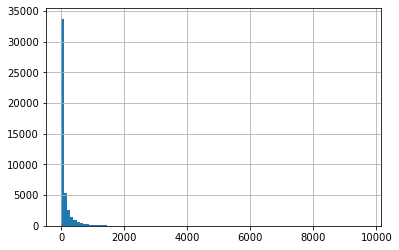

In [108]:
data['Number of Reviews'].hist(bins=100)

In [109]:
data['Number of Reviews'].max()

9660.0

<AxesSubplot:>

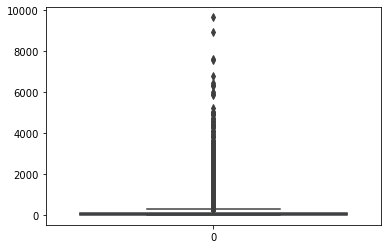

In [110]:
sns.boxplot(data=data['Number of Reviews'])

Number of Reviews - признак числовой непрерывный.     
Распределение, схожее на распределение Парето - несимметричное распределение с обрывом слева

25-й перцентиль: 9.0, 75-й перцентиль: 115.0, IQR: 106.0,  Границы выбросов: [-150.0, 274.0].


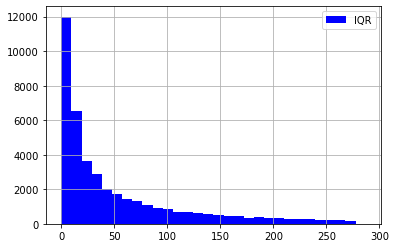

In [111]:
# рассчитаем границы выбросов
median = data['Number of Reviews'].median()
IQR = data['Number of Reviews'].quantile(0.75) - data['Number of Reviews'].quantile(0.25)
perc25 = data['Number of Reviews'].quantile(0.25)
perc75 = data['Number of Reviews'].quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

#data['Number of Reviews'].loc[data['Number of Reviews'] <= 287].hist(bins = 30, 
#                                  range = (0, 287), 
#                                  color = 'red',
#                                  label = 'Здравый смысл')

data['Number of Reviews'].loc[data['Number of Reviews'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 30, 
                                                                        range = (0, 287),
                                                                        color = 'blue',
                                                                        label = 'IQR')

plt.legend();

In [112]:
# Признак Number_of_Reviews_isNAN - признак отсутствия данных в Number_of_Reviews

data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [113]:
# Заполняем пустые значения на самое частое значение - "2" на основании наличия даты отзыва, 
# если встречается ресторан без даты отзыва, заполняем нулём 

data['Number of Reviews'] = data.apply(lambda x: (0 if x.Rev_date_1 == 'NaT' else 2) if pd.isna(x['Number of Reviews']) else x['Number of Reviews'], axis=1)

In [114]:
data.info(verbose=True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49963 entries, 0 to 49999
Data columns (total 213 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Restaurant_id            49963 non-null  float64       
 1   City                     49963 non-null  object        
 2   Cuisine Style            49963 non-null  object        
 3   Ranking                  49963 non-null  float64       
 4   Rating                   49963 non-null  float64       
 5   Price Range              49963 non-null  float64       
 6   Number of Reviews        49963 non-null  float64       
 7   URL_TA                   49963 non-null  object        
 8   ID_TA                    49963 non-null  object        
 9   sample                   49963 non-null  int64         
 10  is_capital               49963 non-null  int64         
 11  Amsterdam                49963 non-null  uint8         
 12  Athens                   49963 

### URL_TA     
      
содержит адреса страничек ресторанов на сайте 'www.tripadvisor.com'
Информация нужна в случае, если бы брали информацию с сайта. С сайта ничего брать не будем.
Удаляем.

In [115]:
data.drop(['URL_TA'], axis = 1, inplace = True)

### ID_TA     
     
Пустых значений нет

In [116]:
data.ID_TA

0         d1912643
1         d7992032
2         d8632781
3         d1358776
4         d6864963
           ...    
49995    d11916827
49996    d12701633
49997    d13198194
49998     d3862815
49999    d10342814
Name: ID_TA, Length: 49963, dtype: object

In [117]:
data['ID_TA'] = data['ID_TA'].str.replace('d', '').astype(int)

<AxesSubplot:>

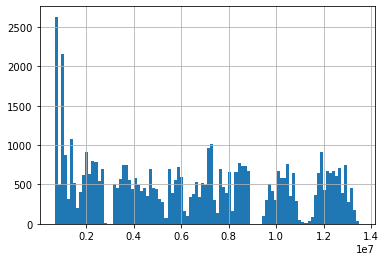

In [118]:
data.ID_TA.hist(bins=100)

<AxesSubplot:>

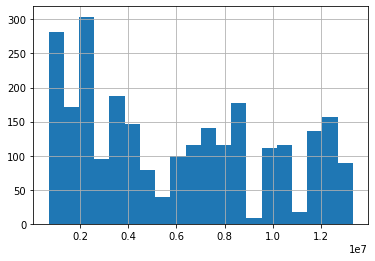

In [119]:
data['ID_TA'][data['City'] =='Rome'].hist(bins=20)

ID_TA - имеем хаотичное распределение, характер распределения не меняется от города к городу.

In [120]:
data.info(verbose=True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49963 entries, 0 to 49999
Data columns (total 212 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Restaurant_id            49963 non-null  float64       
 1   City                     49963 non-null  object        
 2   Cuisine Style            49963 non-null  object        
 3   Ranking                  49963 non-null  float64       
 4   Rating                   49963 non-null  float64       
 5   Price Range              49963 non-null  float64       
 6   Number of Reviews        49963 non-null  float64       
 7   ID_TA                    49963 non-null  int32         
 8   sample                   49963 non-null  int64         
 9   is_capital               49963 non-null  int64         
 10  Amsterdam                49963 non-null  uint8         
 11  Athens                   49963 non-null  uint8         
 12  Barcelona                49963 

### Посмотрим распределение целевой переменной

<AxesSubplot:>

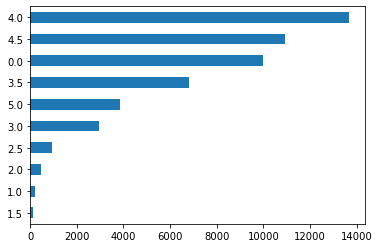

In [121]:
data['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

<AxesSubplot:>

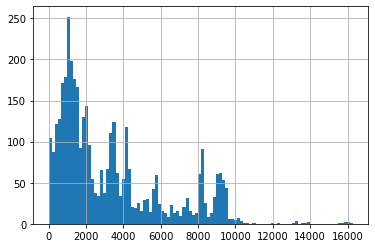

In [122]:
data['Ranking'][data['Rating'] == 5].hist(bins=100)

<AxesSubplot:>

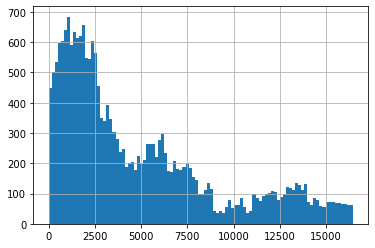

In [123]:
data['Ranking'][data['Rating'] < 4].hist(bins=100)

###  Корреляция признаков

In [124]:
data.corr()

,Restaurant_id,Ranking,Rating,Price Range,Number of Reviews,ID_TA,sample,is_capital,Amsterdam,Athens,...,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna,delta_days,Review_weekday_1,Review_weekday_2,Number_of_Reviews_isNAN
Restaurant_id,1.000000,0.825062,-0.257039,-0.020462,-0.185683,0.039756,-0.147392,0.185461,-0.075454,-0.077948,...,0.469285,0.456258,0.540604,0.199599,0.189696,0.086503,0.046083,-0.039986,-0.081554,0.076974
Ranking,0.825062,1.000000,-0.109796,-0.026298,-0.223076,0.049752,0.006376,0.224692,-0.094143,-0.094513,...,0.570810,0.554919,0.655932,0.242922,0.233893,0.107375,0.061032,-0.052773,-0.097880,0.094786
Rating,-0.257039,-0.109796,1.000000,-0.012218,0.011014,0.049529,0.936563,0.008658,0.007514,0.016903,...,-0.168608,-0.168537,-0.006782,-0.134931,-0.020528,-0.010396,-0.016462,0.005632,0.002453,-0.000529
Price Range,-0.020462,-0.026298,-0.012218,1.000000,0.107826,-0.061741,-0.003431,0.000519,-0.003028,-0.023958,...,-0.043937,-0.042807,-0.023056,0.011994,0.209000,0.076986,-0.026953,-0.035803,-0.031893,0.040990
Number of Reviews,-0.185683,-0.223076,0.011014,0.107826,1.000000,-0.289653,0.002635,-0.000058,0.014541,-0.012791,...,-0.407150,-0.407641,0.084751,-0.346077,-0.266525,-0.163791,-0.080915,0.081539,0.146122,-0.104783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Reviews_isna,0.086503,0.107375,-0.010396,0.076986,-0.163791,0.247782,-0.002795,-0.096041,-0.055343,-0.012688,...,0.295451,0.295699,-0.071923,0.255866,0.412093,1.000000,-0.192921,-0.512987,-0.440613,0.333674
delta_days,0.046083,0.061032,-0.016462,-0.026953,-0.080915,-0.177174,-0.004310,0.001018,-0.019426,-0.000040,...,0.103171,0.103276,-0.016548,0.105385,0.022420,-0.192921,1.000000,0.088157,0.162139,-0.114679
Review_weekday_1,-0.039986,-0.052773,0.005632,-0.035803,0.081539,-0.125029,0.004047,0.043468,0.014943,0.005176,...,-0.152575,-0.152716,0.047442,-0.133774,-0.218167,-0.512987,0.088157,1.000000,0.233569,-0.176818
Review_weekday_2,-0.081554,-0.097880,0.002453,-0.031893,0.146122,-0.194221,-0.000413,0.044480,0.037306,0.001114,...,-0.243984,-0.244122,0.055987,-0.215025,-0.316239,-0.440613,0.162139,0.233569,1.000000,-0.261916


<AxesSubplot:>

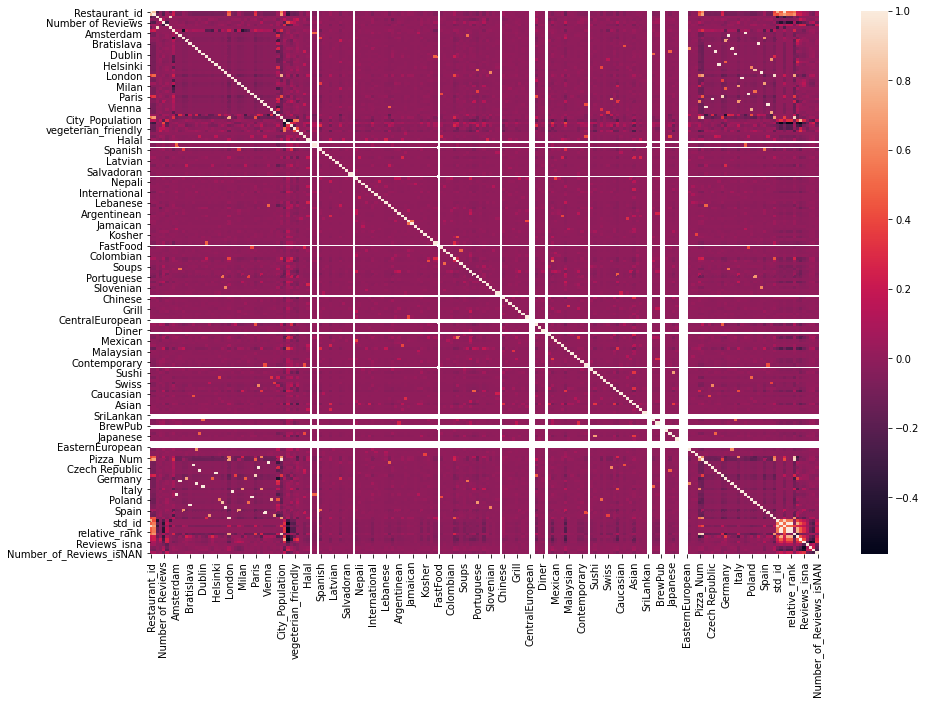

In [125]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.corr(),)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [126]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output.drop(['City','Cuisine Style', 'Country', 'Rev_txt_1', 'Rev_txt_2', 'Rev_date_1', 'Rev_date_2'], axis = 1, inplace=True)
    #df_output.drop(['std_Ranking'], axis = 1, inplace=True)
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    #df_output['Number of Reviews'].fillna(0, inplace=True)
    # тут ваш код по обработке NAN
    # ....
    
    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    #df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
    # тут ваш код не Encoding фитчей
    # ....
    
    
    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    # ....
    
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    
    #object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    #df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

#### Запускаем и проверяем что получилось

In [127]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Restaurant_id,Ranking,Rating,Price Range,Number of Reviews,ID_TA,sample,is_capital,Amsterdam,Athens,...,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna,delta_days,Review_weekday_1,Review_weekday_2,Number_of_Reviews_isNAN
26071,3547.0,3555.0,5.0,2.0,6.0,11923408,1,1,0,0,...,0.848782,1.957599,199875.0,0.017786,0,0,23.0,0.0,5.0,0
1517,3355.0,3357.0,4.0,2.0,46.0,2649839,1,1,0,0,...,0.381017,0.880409,357185.0,0.009398,0,0,0.0,3.0,0.0,0
40221,221.0,1338.0,0.0,2.0,2.0,12900078,0,0,0,0,...,0.501689,1.188277,93952.0,0.014241,1,1,0.0,0.0,0.0,0
17503,1945.0,1947.0,3.5,2.0,490.0,2419773,1,0,0,0,...,0.310169,0.722717,431350.0,0.004514,0,0,-138.0,1.0,6.0,0
25657,4685.0,4686.0,4.5,2.0,34.0,4083586,1,1,0,0,...,0.334907,0.767191,680827.0,0.006883,0,0,768.0,5.0,0.0,0
8787,207.0,208.0,4.5,1.0,207.0,4064502,1,1,0,0,...,0.055705,0.126290,196347.0,0.001059,0,0,10.0,5.0,2.0,0
44752,4752.0,844.0,0.0,2.0,31.0,8808474,0,1,0,0,...,0.132182,0.312015,155923.0,0.005413,0,0,60.0,3.0,6.0,0
4767,880.0,882.0,4.5,2.0,11.0,8667813,1,1,0,1,...,0.492713,1.136598,67765.0,0.013016,0,0,33.0,4.0,6.0,0
32845,919.0,920.0,4.5,2.0,3.0,10003871,1,0,0,0,...,0.739340,1.660650,67635.0,0.013602,1,0,37.0,3.0,1.0,0
23987,7212.0,7213.0,4.5,2.0,11.0,9602752,1,1,0,0,...,0.515626,1.180910,680827.0,0.010594,0,1,0.0,0.0,0.0,0


In [128]:
df_preproc.info(verbose=True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49963 entries, 0 to 49999
Data columns (total 205 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Restaurant_id            49963 non-null  float64
 1   Ranking                  49963 non-null  float64
 2   Rating                   49963 non-null  float64
 3   Price Range              49963 non-null  float64
 4   Number of Reviews        49963 non-null  float64
 5   ID_TA                    49963 non-null  int32  
 6   sample                   49963 non-null  int64  
 7   is_capital               49963 non-null  int64  
 8   Amsterdam                49963 non-null  uint8  
 9   Athens                   49963 non-null  uint8  
 10  Barcelona                49963 non-null  uint8  
 11  Berlin                   49963 non-null  uint8  
 12  Bratislava               49963 non-null  uint8  
 13  Brussels                 49963 non-null  uint8  
 14  Budapest             

In [129]:
df_preproc.to_csv('df_preproc_TripAdvisor.csv', index=False)

In [133]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [134]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [135]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 204), (39963, 204), (39963, 203), (31970, 203), (7993, 203))

# Model 
Сам ML

In [136]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [137]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [138]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)
y_pred = np.round(y_pred*2)/2

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


In [139]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.16808457400225196


<AxesSubplot:>

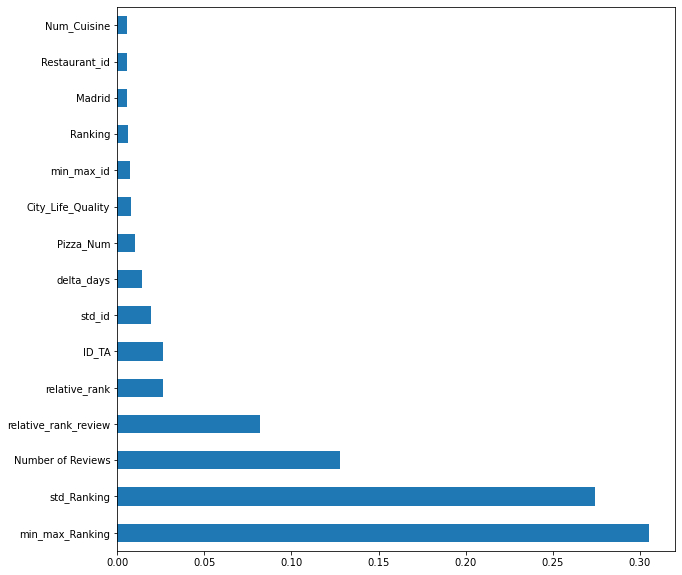

In [140]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [141]:
test_data.sample(10)

,Restaurant_id,Ranking,Rating,Price Range,Number of Reviews,ID_TA,is_capital,Amsterdam,Athens,Barcelona,...,min_max_Ranking,relative_rank,rewiew_in_City,relative_rank_review,Price Range_isNAN,Reviews_isna,delta_days,Review_weekday_1,Review_weekday_2,Number_of_Reviews_isNAN
49481,9481.0,171.0,0.0,2.0,406.0,2660448,0,0,0,0,...,0.136766,0.308664,67635.0,0.002528,0,0,18.0,5.0,1.0,0
45861,5861.0,10326.0,0.0,2.0,6.0,9881026,1,0,0,0,...,0.627927,1.435562,933770.0,0.011058,1,0,226.0,2.0,0.0,0
44560,4560.0,3128.0,0.0,2.0,2.0,7123669,1,0,0,0,...,0.746775,1.722467,199875.0,0.015650,1,1,0.0,0.0,0.0,1
43747,3747.0,9481.0,0.0,2.0,25.0,2042149,1,0,0,0,...,0.677823,1.552227,680827.0,0.013926,1,0,198.0,0.0,5.0,0
47975,7975.0,12829.0,0.0,1.0,9.0,4431448,1,0,0,0,...,0.780150,1.783540,933770.0,0.013739,0,0,7.0,6.0,6.0,0
41290,1290.0,1384.0,0.0,2.0,2.0,13352421,1,0,0,0,...,0.459873,1.053272,113956.0,0.012145,1,0,0.0,5.0,0.0,0
45486,5486.0,1074.0,0.0,2.0,108.0,1186813,0,0,0,0,...,0.388043,0.937991,82386.0,0.013036,0,0,115.0,2.0,6.0,0
45504,5504.0,1381.0,0.0,2.0,5.0,11955151,1,0,0,0,...,0.329431,0.760463,199875.0,0.006909,1,0,69.0,5.0,6.0,0
45541,5541.0,1114.0,0.0,2.0,92.0,4313151,0,0,0,0,...,0.417636,0.989343,93952.0,0.011857,0,0,71.0,3.0,2.0,0
45907,5907.0,912.0,0.0,2.0,231.0,8397910,1,0,0,0,...,0.103429,0.239182,357185.0,0.002553,0,0,28.0,3.0,3.0,0


In [142]:
test_data = test_data.drop(['Rating'], axis=1)

In [143]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


In [144]:
predict_submission

array([3.18 , 4.23 , 4.385, ..., 3.18 , 3.99 , 4.16 ])

In [145]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.180
1,id_1,4.230
2,id_2,4.385
3,id_3,4.330
4,id_4,4.420
5,id_5,4.465
6,id_6,1.585
7,id_7,3.025
8,id_8,4.155
9,id_9,4.630


Score на Kaggle 0.22520                 